In [1]:
# Imports required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from cf_matrix import make_confusion_matrix
import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Filter warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",

  "features_path"   : "car_damage_check/front_rear_side/features.h5",
  "labels_path"     : "car_damage_check/front_rear_side/labels.h5",
  "classifier_path" : "car_damage_check/front_rear_side/classifier.pickle",
  "model_path"      : "car_damage_check/front_rear_side/model",

  "test_size"       : 0.20,
  "seed"            : 9,
}

In [3]:
# Config variables
test_size       = config["test_size"]
seed            = config["seed"]
features_path   = config["features_path"]
labels_path     = config["labels_path"]
classifier_path = config["classifier_path"]

In [4]:
# Import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
# Verify the shape of features and labels
print ("[INFO] features shape: {}".format(features.shape))
print ("[INFO] labels shape: {}".format(labels.shape))

print ("[INFO] training started...")
# Split the training and testing data
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size,
                                                                  random_state=seed)

print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] features shape: (979, 4096)
[INFO] labels shape: (979,)
[INFO] training started...
[INFO] splitted train and test data...
[INFO] train data  : (783, 4096)
[INFO] test data   : (196, 4096)
[INFO] train labels: (783,)
[INFO] test labels : (196,)


In [6]:
# Use logistic regression as the model
print ("[INFO] creating model...")
model = LogisticRegression(max_iter=500, random_state=seed)
model.fit(trainData, trainLabels)

[INFO] creating model...


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# Evaluate the model of test data
preds = model.predict(testData)

In [8]:
preds.shape

(196,)

In [9]:
# Dump classifier to file
print ("[INFO] Saving model...")
pickle.dump(model, open(classifier_path, 'wb'))

[INFO] Saving model...


In [10]:
# Plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
cm

array([[63, 10,  9],
       [16, 40,  8],
       [10,  8, 32]])

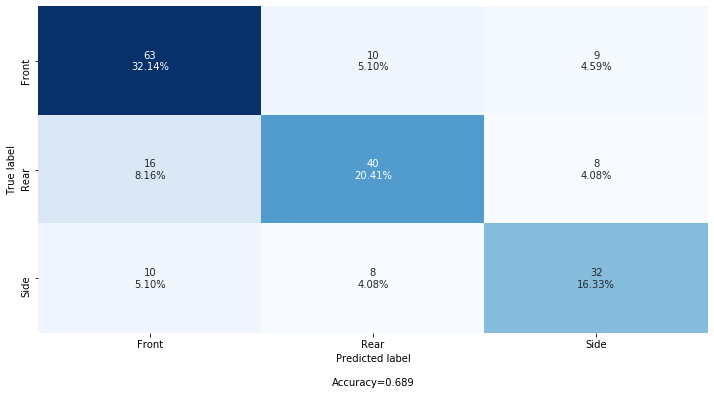

In [11]:
categories = ['Front', 'Rear', 'Side']
labels = ['True Negative','False Positive','False Negative','True Positive']
make_confusion_matrix(cm, figsize=(12,6), 
                      group_names=labels,
                      categories=categories, 
                      cbar=False)